In [35]:
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model1 = StarDist2D.from_pretrained('2D_versatile_fluo') 
model2 = StarDist2D.from_pretrained('2D_paper_dsb2018') 


There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


2023-08-25 15:34:34.870175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, 'prediction + input overlay')

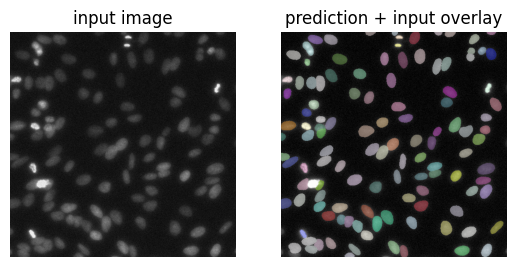

In [36]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

img = test_image_nuclei_2d()

labels, _ = model1.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

In [97]:
from skimage import io, segmentation, exposure, transform, measure
import glob
import os

model = model1

dir_ = "/Users/sarahkeegan/Dropbox (NYU Langone Health)/mac_files/holtlab/data_and_results/H2AX_counting/exp3/TIFs"
output_dir = "/Users/sarahkeegan/Dropbox (NYU Langone Health)/mac_files/holtlab/data_and_results/H2AX_counting/exp3/stardist_segmentation"

img_files = glob.glob(f"{dir_}/*.tif")
nucl_ch=1

#img_files = [f"{dir_}/GBC93evo#1_H3K9_phdn_H2Ax_0015_MAX_proj_GFP.tif",
 #           f"{dir_}/GBC93evo#2_H3K9_phdn_H2Ax_0015_MAX_proj_GFP.tif",
 #           f"{dir_}/GBC80_24tamo_H3K9_phdn_H2Ax_0010_MAX_proj_GFP.tif"]

for img_file in img_files:
    #img_file = f"{dir_}/GBC93evo#1_H3K9_phdn_H2Ax_0015_MAX_proj_GFP.tif"
    #img_file = f"{dir_}/GBC80_24tamo_H3K9_phdn_H2Ax_0010_MAX_proj_GFP.tif"
    file_root = os.path.splitext(os.path.split(img_file)[1])[0]

    if file_root.startswith("GBC93evo"):
        rescale_factor=0.25
    else:
        rescale_factor=0.50

    
    img = io.imread(img_file)
    
    dapi_img = img[nucl_ch]

    labels_, _ = model.predict_instances(normalize(transform.rescale(dapi_img, rescale_factor)))

    labels = transform.resize(labels_, dapi_img.shape, order=0, preserve_range=True)
    #labels = transform.rescale(labels_, 1/rescale_factor, order=0, preserve_range=True)
    

    img_uint8 = exposure.rescale_intensity(dapi_img, out_range=(0, 255)).astype('uint8')
    image_label_overlay = segmentation.mark_boundaries(img_uint8,
                                                       labels,
                                                       color=[0, 1, 0],
                                                       mode='inner')
    # save the image overlay for checking segmentation results
    plt.imsave(os.path.join(output_dir, f"{file_root}.png"), image_label_overlay)
    #plt.imshow(image_label_overlay)
    #plt.show()

    #break

    

    

array([0, 1, 2, 3, 4], dtype=int32)

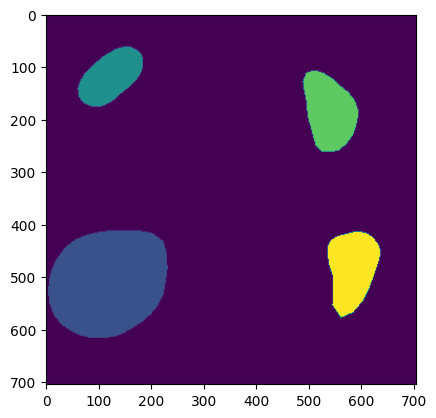

In [75]:
plt.imshow(labels)

import numpy as np
np.unique(labels)
